## K-Means Clustering Algorithm with California Housing Dataset

#### -Basically, the steps of the K-means algorithm are as follows:

 1) Define the number (k) of clusters to the split data into
 
 2) Select k random points within the data
 
 3) Calculate distance between centroids and other points
 
 4) Assign the points to the closest centroid
 
 5) Calculate the centre of each cluster
 
 6) Repeat steps 3-5
 






In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [3]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)
df = dataset.data

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

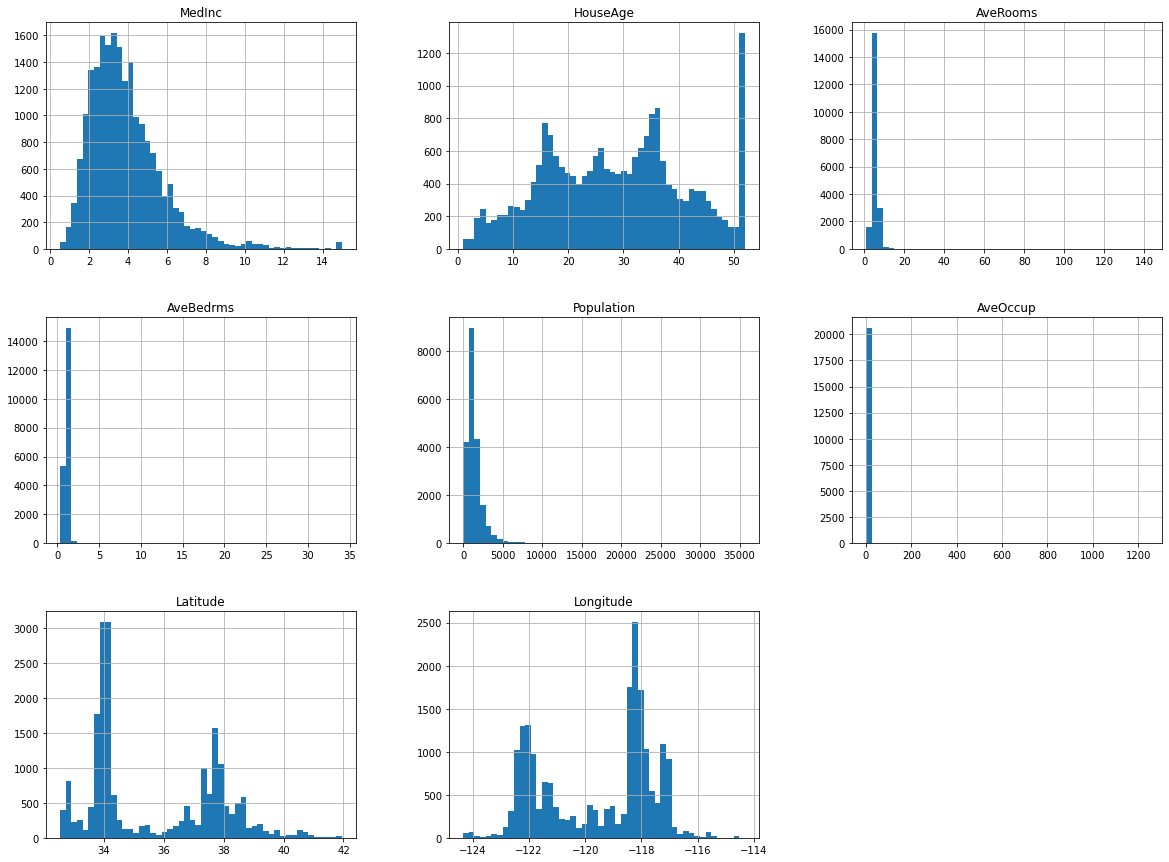

In [7]:
df.hist(bins=50, figsize=(20,15))

### Clustering The Data (2 Variables)

### Identifying Optimum Number of Clusters
<b> The simple idea behind this function is to run kmeans multiple times and plot inertia as the number of clusters increases, the inertia will decrease.
    
internia: this is the mean squared distance between each instance and closest centroid <b/>

In [14]:
#Create function to work out optimum number of clusters

def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans= KMeans(n_clusters = k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

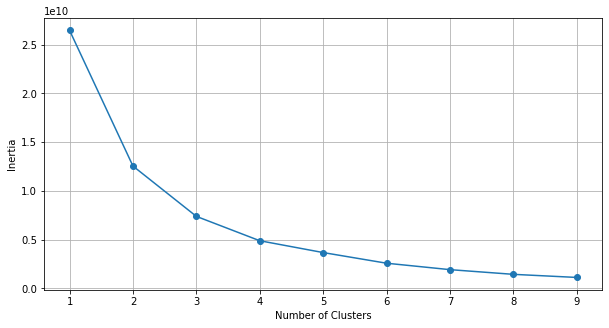

In [15]:
optimise_k_means(df, 10)

#### In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. We can see that there is a big change in inertia and slope from 3 clusters onwards.
 
## Applyig K Means Clustering

In [16]:
kmeans = KMeans(n_clusters =3)
kmeans.fit(df)


KMeans(n_clusters=3)

In [17]:
df['kmeans_3'] =kmeans.labels_
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,kmeans_3
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df['MedInc'],y=df['HouseAge'], c=df['kmeans_3'])
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.show()

## Creating Multiple Clusters

In [33]:
for k in range (1,9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    df[f'KMeans_{k}'] = kmeans.labels_
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6,KMeans_7,KMeans_8
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,0,0,0,3,0,0,3,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1,0,0,1,1,1,1,2,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,0,0,0,3,0,0,3,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,0,0,0,3,0,0,3,2
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,0,0,0,3,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0,0,0,0,3,0,0,3,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0,0,0,0,3,0,0,3,2
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0,0,0,0,3,0,0,0,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0,0,0,0,3,0,0,3,2


In [ ]:
fig, axs =plt.subplots(nrows=1, ncols =5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start =1):
    ax.scatter(x=df['MedInc'],y=df['HouseAge'], c=df[f'KMeans_{i}'])
    ax.set_ylim(3,1.5)
    ax.set_xlim(0,1)
    ax.set_title(f'N Clusters: {i}')

C:\Users\lenovo\AppData\Local\Temp/ipykernel_12468/848349231.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


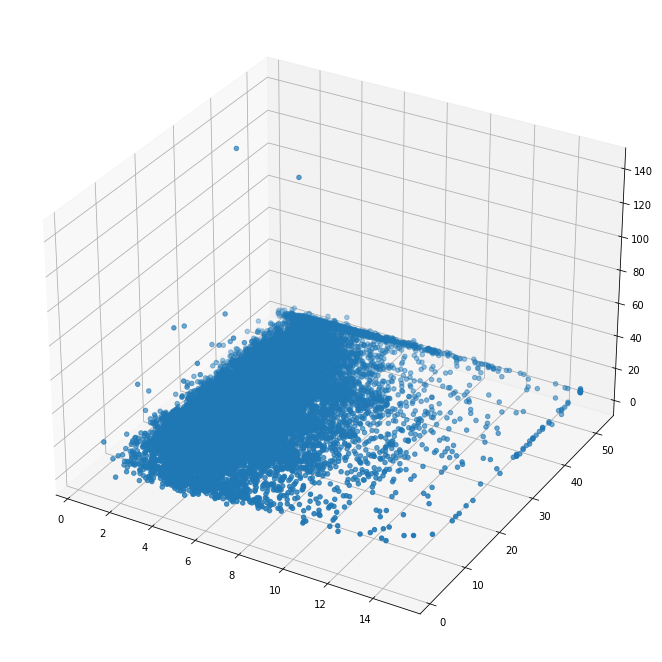

In [40]:
from mpl_toolkits.mplot3d import Axes3D
kmeans = KMeans(n_clusters =5)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_
centers =k_fit.cluster_centers_
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]);

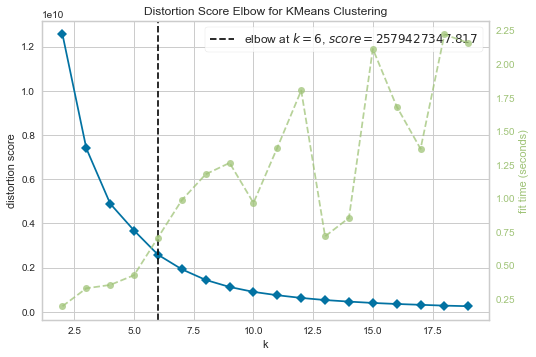

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans= KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20)) #2'den 20'ye kadar olan küme sayılarını dene
visualizer.fit(df)
visualizer.poof()